In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Find out which country to focus on:
How many subscribers are there?

How large is the population?

In [ ]:
df_subs = pd.read_csv('/content/drive/MyDrive/Project 1/subs_country.csv') # Omg it works
df_subs.head()

,country,note,subscribers
0,Albania,Subscribers (Estimate),90489
1,Algeria,Subscribers (Estimate),60
2,Angola,Subscribers (Estimate),30163
3,Argentina,Subscribers (Estimate),6334230
4,Armenia,Subscribers (Estimate),30163


In [ ]:
# Remove 'note' column

df_subs = df_subs.drop(['note'], axis=1)
df_subs

,country,subscribers
0,Albania,90489
1,Algeria,60
2,Angola,30163
3,Argentina,6334230
4,Armenia,30163
...,...,...
89,United Kingdom,18399430
90,United States,81440100
91,Uruguay,452445
92,Venezuela,30163


In [ ]:
# Get the world population dataset
df_pop = pd.read_csv('/content/drive/MyDrive/Project 1/world_population.csv')
df_pop

,Rank,Country,Population (2024),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,India,"1,450,935,791",0.89 %,"12,866,195",488,"2,973,190","-630,830",2.0,28,37 %,17.78 %
1,2,China,"1,419,321,278",-0.23 %,"-3,263,655",151,"9,388,211","-318,992",1.0,40,66 %,17.39 %
2,3,United States,"345,426,571",0.57 %,"1,949,236",38,"9,147,420","1,286,132",1.6,38,82 %,4.23 %
3,4,Indonesia,"283,487,931",0.82 %,"2,297,864",156,"1,811,570","-38,469",2.1,30,59 %,3.47 %
4,5,Pakistan,"251,269,164",1.52 %,"3,764,669",326,"770,880","-1,401,173",3.5,20,34 %,3.08 %
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,Montserrat,"4,389",-0.70 %,-31,44,100,-7,1.4,42,11 %,0.00 %
230,231,Falkland Islands,"3,470",-0.20 %,-7,0,"12,170",-13,1.7,42,68 %,0.00 %
231,232,Tokelau,"2,506",4.55 %,109,251,10,72,2.6,27,0 %,0.00 %
232,233,Niue,"1,819",0.11 %,2,7,260,10,2.5,36,44 %,0.00 %


In [ ]:
# Check types
df_pop.dtypes

,0
Rank,int64
Country,object
Population (2024),object
Yearly Change,object
Net Change,object
Density (P/Km²),object
Land Area (Km²),object
Migrants (net),object
Fert. Rate,float64
Med. Age,int64


In [ ]:
# Clean the dataframe: I only need country and population and I need Population to be integers, not objects

# First, create new dataframe with only country and population
df_pop_new = pd.DataFrame({
    "Country": df_pop["Country"],
    "Population (2024)": df_pop["Population (2024)"]
})

df_pop_new

,Country,Population (2024)
0,India,"1,450,935,791"
1,China,"1,419,321,278"
2,United States,"345,426,571"
3,Indonesia,"283,487,931"
4,Pakistan,"251,269,164"
...,...,...
229,Montserrat,"4,389"
230,Falkland Islands,"3,470"
231,Tokelau,"2,506"
232,Niue,"1,819"


In [ ]:
# Remove commas from population column and turn into integers
df_pop_new["Population (2024)"] = df_pop_new["Population (2024)"].str.replace(",", "").astype(int)

df_pop_new

,Country,Population (2024)
0,India,1450935791
1,China,1419321278
2,United States,345426571
3,Indonesia,283487931
4,Pakistan,251269164
...,...,...
229,Montserrat,4389
230,Falkland Islands,3470
231,Tokelau,2506
232,Niue,1819


In [ ]:
# Change name of columns for easier merging

df_pop_new = df_pop_new.rename(columns={'Country': 'country', 'Population (2024)': 'population'})

df_pop_new

,country,population
0,India,1450935791
1,China,1419321278
2,United States,345426571
3,Indonesia,283487931
4,Pakistan,251269164
...,...,...
229,Montserrat,4389
230,Falkland Islands,3470
231,Tokelau,2506
232,Niue,1819


In [ ]:
# Combine the dataframes for subscribers and population. Use inner merge to only keep rows that have a country value in each of the dataframes

df_sub_pop = pd.merge(df_subs, df_pop_new, on="country", how="inner")
df_sub_pop

,country,subscribers,population
0,Albania,90489,2791765
1,Algeria,60,46814308
2,Angola,30163,37885849
3,Argentina,6334230,45696159
4,Armenia,30163,2973840
...,...,...,...
86,United Kingdom,18399430,69138192
87,United States,81440100,345426571
88,Uruguay,452445,3386588
89,Venezuela,30163,28405543


In [ ]:
# Calculate the subscriber rate (percentage of population)

df_sub_pop["subscriber rate (%)"] = (df_sub_pop["subscribers"] / df_sub_pop["population"]) * 100

# Sort the DataFrame by population in descending order
df_sorted_pop = df_sub_pop.sort_values(by="population", ascending=False)

# Display the new DataFrame
df_sorted_pop

,country,subscribers,population,subscriber rate (%)
36,India,12366830,1450935791,0.852335
87,United States,81440100,345426571,23.576675
37,Indonesia,4222820,283487931,1.489594
56,Nigeria,150815,232679478,0.064817
14,Brazil,16589650,211998573,7.825359
...,...,...,...,...
52,Montenegro,30163,638479,4.724196
76,Suriname,30163,634431,4.754339
49,Malta,60326,539607,11.179618
8,Bahamas,60326,401283,15.033281


In [ ]:
# Get top 20 countries by population

df_top_20 = df_sorted_pop[0:19]
df_top_20

,country,subscribers,population,subscriber rate (%)
36,India,12366830,1450935791,0.852335
87,United States,81440100,345426571,23.576675
37,Indonesia,4222820,283487931,1.489594
56,Nigeria,150815,232679478,0.064817
14,Brazil,16589650,211998573,7.825359
10,Bangladesh,30163,173562364,0.017379
26,Ethiopia,30163,132059767,0.022840
50,Mexico,13874980,130861007,10.602838
42,Japan,9048900,123753041,7.312063
24,Egypt,90489,116538258,0.077647


<ipython-input-74-d5be7f5da5af>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_sorted["country"], rotation=45, ha="right")  # Rotate labels for readability


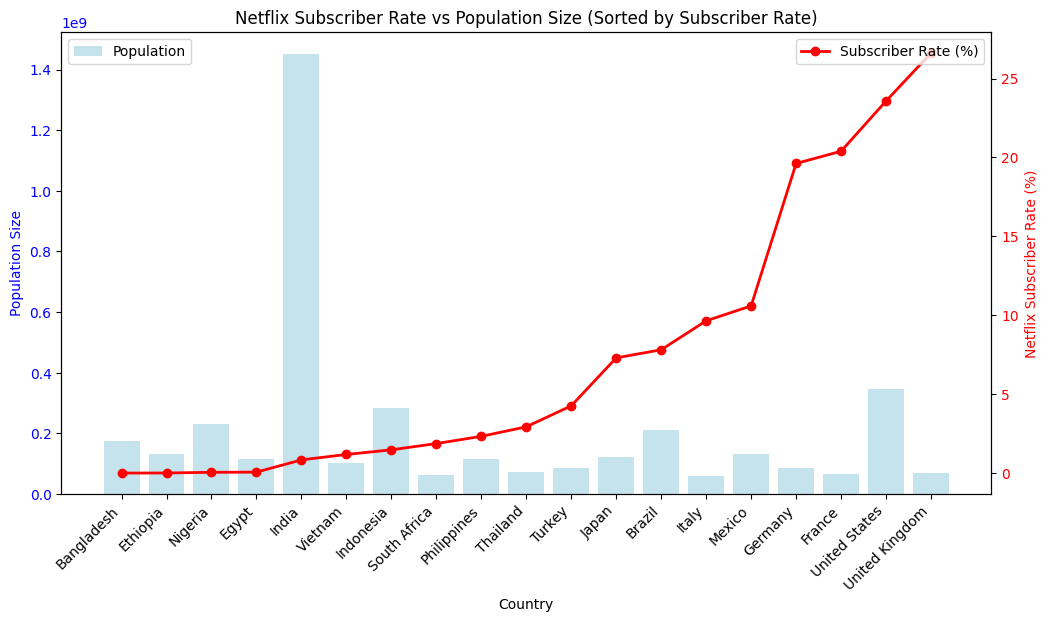

In [ ]:
# Create a plot showing the top 20 countries by population size and their subscriber rate

import matplotlib.pyplot as plt
import seaborn as sns

# Sort DataFrame by Subscriber Rate (%), in ascending order
df_sorted = df_top_20.sort_values(by="subscriber rate (%)", ascending=True)

# Set figure size
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for population size (light blue bars)
ax1.bar(df_sorted["country"], df_sorted["population"], color="lightblue", alpha=0.7, label="Population")
ax1.set_xlabel("Country")
ax1.set_ylabel("Population Size", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.set_xticklabels(df_sorted["country"], rotation=45, ha="right")  # Rotate labels for readability

# Create a second y-axis for subscriber rate (%)
ax2 = ax1.twinx()
ax2.plot(df_sorted["country"], df_sorted["subscriber rate (%)"],
         color="red", marker="o", linestyle="-", linewidth=2, label="Subscriber Rate (%)")
ax2.set_ylabel("Netflix Subscriber Rate (%)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Title and legend
plt.title("Netflix Subscriber Rate vs Population Size (Sorted by Subscriber Rate)")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Show plot
plt.show()

In [ ]:
# Focus on the left end of the graph: this is where subscriber rate is low. All of these countries have a large population.

# 2. Focus on India: What are people watching on Netflix?

In [ ]:
# Import viewership dataset. This shows the 10 most popular tv shows and movies on Netflix per week for 2021-2023 by country.

df_views = pd.read_csv("/content/drive/MyDrive/Project 1/viewership_countries.csv", encoding='latin1')
df_views

,country_name,country_iso2,week,category,weekly_rank,show_title,season_title,cumulative_weeks_in_top_10
0,Argentina,AR,2023-12-17,Films,1,Leave the World Behind,NaN,2
1,Argentina,AR,2023-12-17,Films,2,El Amor Menos Pensado,NaN,1
2,Argentina,AR,2023-12-17,Films,3,Old,NaN,1
3,Argentina,AR,2023-12-17,Films,4,The Lost City,NaN,1
4,Argentina,AR,2023-12-17,Films,5,Women on the Edge,NaN,3
...,...,...,...,...,...,...,...,...
240635,Vietnam,VN,2021-07-04,TV,6,Reply 1988,Reply 1988: Season 1,1
240636,Vietnam,VN,2021-07-04,TV,7,"Nevertheless,","Nevertheless,: Season 1",1
240637,Vietnam,VN,2021-07-04,TV,8,Too Hot to Handle,Too Hot to Handle: Season 2,1
240638,Vietnam,VN,2021-07-04,TV,9,Record of Ragnarok,Record of Ragnarok: Season 1,1


In [ ]:
# Select only information for India

df_views_india = df_views.loc[df_views['country_name'] == 'India']
df_views_india

,country_name,country_iso2,week,category,weekly_rank,show_title,season_title,cumulative_weeks_in_top_10
85140,India,IN,2023-12-17,Films,1,Dhak Dhak,NaN,2
85141,India,IN,2023-12-17,Films,2,The Archies,NaN,2
85142,India,IN,2023-12-17,Films,3,Japan,NaN,1
85143,India,IN,2023-12-17,Films,4,Mission Raniganj: The Great Bharat Rescue,NaN,3
85144,India,IN,2023-12-17,Films,5,Leave the World Behind,NaN,1
...,...,...,...,...,...,...,...,...
87715,India,IN,2021-07-04,TV,6,Lucifer,Lucifer: Season 3,1
87716,India,IN,2021-07-04,TV,7,Lucifer,Lucifer: Season 2,1
87717,India,IN,2021-07-04,TV,8,Friends,Friends: Season 6,1
87718,India,IN,2021-07-04,TV,9,Friends,Friends: Season 5,1


In [ ]:
# Remove columns I don't need

df_views_india.drop(columns = ['country_iso2', 'week', 'season_title', 'weekly_rank', 'cumulative_weeks_in_top_10'], inplace = True)
df_views_india

<ipython-input-78-5c8be90f431c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_views_india.drop(columns = ['country_iso2', 'week', 'season_title', 'weekly_rank', 'cumulative_weeks_in_top_10'], inplace = True)


,country_name,category,show_title
85140,India,Films,Dhak Dhak
85141,India,Films,The Archies
85142,India,Films,Japan
85143,India,Films,Mission Raniganj: The Great Bharat Rescue
85144,India,Films,Leave the World Behind
...,...,...,...
87715,India,TV,Lucifer
87716,India,TV,Lucifer
87717,India,TV,Friends
87718,India,TV,Friends


In [ ]:
# Check for nulls

df_views_india.isna().sum()

,0
country_name,0
category,0
show_title,0


In [ ]:
# Find greatest hits for TV / Film - which titles appear the most times in the dataset?

top_movies_india = df_views_india[df_views_india["category"] == "Films"]["show_title"].value_counts().head(10)
top_tv_india = df_views_india[df_views_india["category"] == "TV"]["show_title"].value_counts().head(10)

print(f"Top 10 Netflix movies in India: \n{top_movies_india}\n")
print(f"Top 10 Netflix TV shows in India: \n{top_tv_india}")

Top 10 Netflix movies in India: 
show_title
RRR (Hindi)                 25
Sooryavanshi                20
Haseen Dillruba             17
Red Notice                  15
Mimi                        14
Bhool Bhulaiyaa 2           12
Kantara (Hindi)             11
Chandigarh Kare Aashiqui    10
Badhaai Do                  10
Meenakshi Sundareshwar       9
Name: count, dtype: int64

Top 10 Netflix TV shows in India: 
show_title
Money Heist           94
Stranger Things       46
Manifest              37
The Good Doctor       32
Never Have I Ever     31
Squid Game            30
Wednesday             28
All of Us Are Dead    28
Friends               25
Lucifer               20
Name: count, dtype: int64


# 3. What are the genres of the most viewed productions and where were they made?

In [ ]:

# Now we want to figure out whether these top movies and shows were made in India or not, and what their genre is.
# Let's use the The Movie Database API to find out.

In [ ]:

# Put top movies in a list

top_movies_india = top_movies_india.index.tolist()
top_movies_india


['RRR (Hindi)',
 'Sooryavanshi',
 'Haseen Dillruba',
 'Red Notice',
 'Mimi',
 'Bhool Bhulaiyaa 2',
 'Kantara (Hindi)',
 'Chandigarh Kare Aashiqui',
 'Badhaai Do',
 'Meenakshi Sundareshwar']

In [ ]:
# Put top TV shows in a list

top_tv_india = top_tv_india.index.tolist()
top_tv_india

['Money Heist',
 'Stranger Things',
 'Manifest',
 'The Good Doctor',
 'Never Have I Ever',
 'Squid Game',
 'Wednesday',
 'All of Us Are Dead',
 'Friends',
 'Lucifer']

In [ ]:
# Now I want to figure out whether these top movies and shows were made in India or not, and what their genre is.
# Let's use the The Movie Database API to find out.

In [ ]:
import requests
!pip install tmdbsimple
import tmdbsimple as tmdb # A wrapper for The Movies Database

In [ ]:
tmdb.API_KEY = '96bc044270101a191ee800e2e4982759'

# Make a function to get the movie ID

def get_movie_id(movie_titles):
    ''' Put in a list of movie titles and get a dictionary with the titles and their tmbd id'''
    search = tmdb.Search()
    movie_ids = {}

    for title in movie_titles:
        response = search.movie(query=title)  # Search for the movie by title
        if response['results']:  # Check if results exist
            movie_ids[title] = response['results'][0]['id']  # Get the first result's ID
        else:
            movie_ids[title] = None  # No result found

    return movie_ids

movies_india_ids = get_movie_id(top_movies_india)
movies_india_ids



{'RRR (Hindi)': None,
 'Sooryavanshi': 592508,
 'Haseen Dillruba': 695969,
 'Red Notice': 512195,
 'Mimi': 237443,
 'Bhool Bhulaiyaa 2': 695962,
 'Kantara (Hindi)': None,
 'Chandigarh Kare Aashiqui': 755836,
 'Badhaai Do': 754716,
 'Meenakshi Sundareshwar': 828871}

In [ ]:
# We're missing a few ID's, let's search for them manually

search = tmdb.Search()
response = search.movie(query='RRR')
print(response['results'][0]['id'])

579974


In [ ]:
# Add this to the dictionary

movies_india_ids["RRR (Hindi)"] = 579974
movies_india_ids

{'RRR (Hindi)': 579974,
 'Sooryavanshi': 592508,
 'Haseen Dillruba': 695969,
 'Red Notice': 512195,
 'Mimi': 237443,
 'Bhool Bhulaiyaa 2': 695962,
 'Kantara (Hindi)': None,
 'Chandigarh Kare Aashiqui': 755836,
 'Badhaai Do': 754716,
 'Meenakshi Sundareshwar': 828871}

In [ ]:
# Do the same for Kantara

search = tmdb.Search()
response = search.movie(query='Kantara')
print(response['results'][0]['id'])

858485


In [ ]:
movies_india_ids["Kantara (Hindi)"] = 858485
movies_india_ids  # Now the dictionary is complete.

{'RRR (Hindi)': 579974,
 'Sooryavanshi': 592508,
 'Haseen Dillruba': 695969,
 'Red Notice': 512195,
 'Mimi': 237443,
 'Bhool Bhulaiyaa 2': 695962,
 'Kantara (Hindi)': 858485,
 'Chandigarh Kare Aashiqui': 755836,
 'Badhaai Do': 754716,
 'Meenakshi Sundareshwar': 828871}

In [ ]:
# Same function, but for TV shows (different endpoint)

def get_tv_id(tv_titles):
    ''' Put in a list of TV titles and get a dictionary with the titles and their TMDB IDs.'''
    search = tmdb.Search()
    tv_ids = {}

    for title in tv_titles:
        response = search.tv(query=title)  # Search only in TV database
        if response['results']:
            tv_ids[title] = response['results'][0]['id']  # Get first match
        else:
            tv_ids[title] = None  # No result found

    return tv_ids

In [ ]:
# Get TMDB ids fot TV shows
tv_india_ids = get_tv_id(top_tv_india)
tv_india_ids

{'Money Heist': 71446,
 'Stranger Things': 66732,
 'Manifest': 79696,
 'The Good Doctor': 71712,
 'Never Have I Ever': 100883,
 'Squid Game': 93405,
 'Wednesday': 119051,
 'All of Us Are Dead': 99966,
 'Friends': 1668,
 'Lucifer': 63174}

In [ ]:
# Write a function to get more details about these movies

def get_movie_details(movie_ids):
    """
    Put in a dictionary of movie titles and their TMDb IDs
    and get a dictionary with genres, original language, and production countries.
    """
    movie_details = {} # The empty dictionary, to be filled with what is returned

    for title, movie_id in movie_ids.items():
        if movie_id:  # Check if there is a valid ID
            movie = tmdb.Movies(movie_id)
            response = movie.info()  # Fetch movie details

            # Extract desired information
            genres = [genre['name'] for genre in response.get('genres', [])]
            original_language = response.get('original_language', 'N/A')
            production_countries = [country['name'] for country in response.get('production_countries', [])]

            # Store the data in the dictionary
            movie_details[title] = {
                'genres': genres,
                'original_language': original_language,
                'production_countries': production_countries
            }

    return movie_details

india_movie_details = get_movie_details(movies_india_ids)
print(india_movie_details)

{'RRR (Hindi)': {'genres': ['Action', 'Adventure', 'Drama'], 'original_language': 'te', 'production_countries': ['India']}, 'Sooryavanshi': {'genres': ['Action', 'Crime', 'Thriller'], 'original_language': 'hi', 'production_countries': ['India']}, 'Haseen Dillruba': {'genres': ['Mystery', 'Thriller', 'Crime', 'Romance'], 'original_language': 'hi', 'production_countries': ['India']}, 'Red Notice': {'genres': ['Action', 'Comedy', 'Crime'], 'original_language': 'en', 'production_countries': ['United States of America']}, 'Mimi': {'genres': ['Drama', 'Romance'], 'original_language': 'en', 'production_countries': ['United Kingdom']}, 'Bhool Bhulaiyaa 2': {'genres': ['Horror', 'Comedy'], 'original_language': 'hi', 'production_countries': ['India']}, 'Kantara (Hindi)': {'genres': ['Action', 'Adventure', 'Thriller'], 'original_language': 'kn', 'production_countries': ['India']}, 'Chandigarh Kare Aashiqui': {'genres': ['Drama', 'Romance', 'Crime'], 'original_language': 'hi', 'production_countrie

In [ ]:
# Turn this dictionary into a dataframe

india_movie_details = pd.DataFrame(india_movie_details)

india_movie_details_switched = india_movie_details.T # Switch axes

india_movie_details_switched

,genres,original_language,production_countries
RRR (Hindi),"[Action, Adventure, Drama]",te,[India]
Sooryavanshi,"[Action, Crime, Thriller]",hi,[India]
Haseen Dillruba,"[Mystery, Thriller, Crime, Romance]",hi,[India]
Red Notice,"[Action, Comedy, Crime]",en,[United States of America]
Mimi,"[Drama, Romance]",en,[United Kingdom]
Bhool Bhulaiyaa 2,"[Horror, Comedy]",hi,[India]
Kantara (Hindi),"[Action, Adventure, Thriller]",kn,[India]
Chandigarh Kare Aashiqui,"[Drama, Romance, Crime]",hi,[India]
Badhaai Do,"[Comedy, Drama]",hi,[India]
Meenakshi Sundareshwar,"[Romance, Drama]",hi,[India]


In [ ]:
# Fix production_countries - they dont need to be lists

india_movie_details_switched['production_countries'] = india_movie_details_switched['production_countries'].apply(lambda x: x[0] if isinstance(x, list) else x)
india_movie_details_switched

,genres,original_language,production_countries
RRR (Hindi),"[Action, Adventure, Drama]",te,India
Sooryavanshi,"[Action, Crime, Thriller]",hi,India
Haseen Dillruba,"[Mystery, Thriller, Crime, Romance]",hi,India
Red Notice,"[Action, Comedy, Crime]",en,United States of America
Mimi,"[Drama, Romance]",en,United Kingdom
Bhool Bhulaiyaa 2,"[Horror, Comedy]",hi,India
Kantara (Hindi),"[Action, Adventure, Thriller]",kn,India
Chandigarh Kare Aashiqui,"[Drama, Romance, Crime]",hi,India
Badhaai Do,"[Comedy, Drama]",hi,India
Meenakshi Sundareshwar,"[Romance, Drama]",hi,India


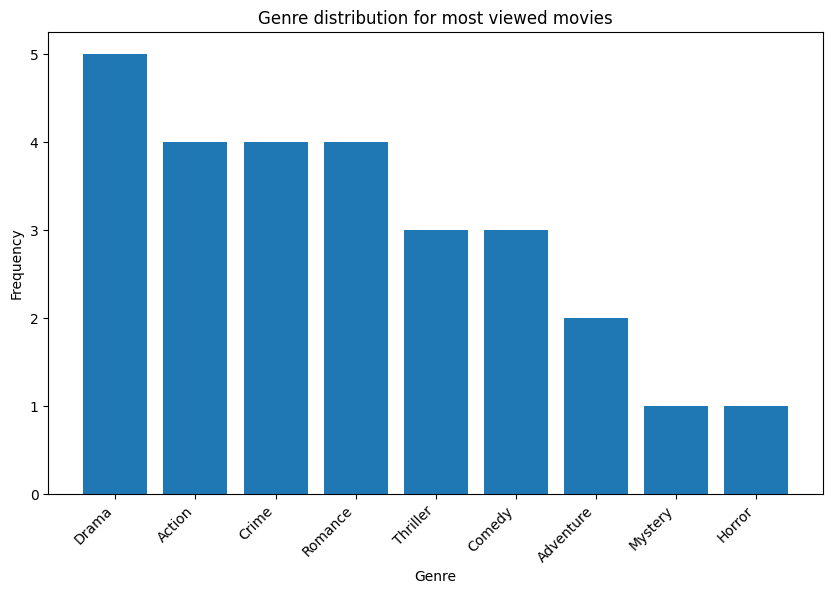

In [ ]:
# Create bar chart of genres that appear most in the top movies

from collections import Counter
# Flatten genres and count occurrences
all_genres = [genre for sublist in india_movie_details_switched['genres'] for genre in sublist]
genre_counts = Counter(all_genres)
sorted_genre_counts = dict(sorted(genre_counts.items(), key=lambda x: x[1], reverse=True))

# Plot genre distribution
plt.figure(figsize=(10, 6))
plt.bar(sorted_genre_counts.keys(), sorted_genre_counts.values())
plt.title('Genre distribution for most viewed movies')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

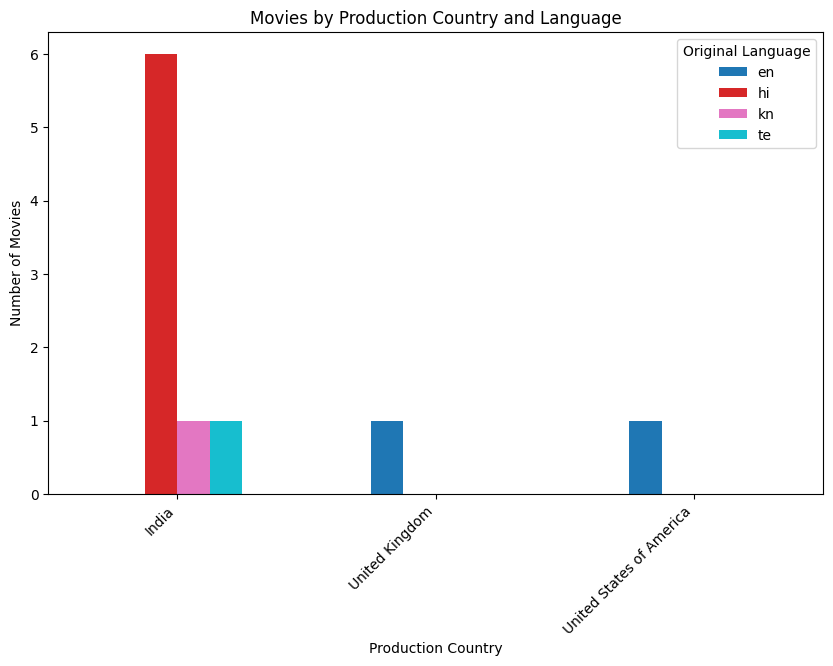

In [ ]:
# Grouped bar chart to show production countries and language distribution

country_language_counts = india_movie_details_switched.groupby(['production_countries', 'original_language']).size().unstack(fill_value=0)

country_language_counts.plot(kind='bar', stacked=False, figsize=(10, 6), colormap='tab10')

plt.title('Movies by Production Country and Language')
plt.xlabel('Production Country')
plt.ylabel('Number of Movies')
plt.legend(title='Original Language')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
# Same function, but for TV

def get_tv_details(tv_ids):
    """
    Put in a dictionary of movie titles and their TMDb IDs
    and get a dictionary with genres, original language, and production countries.
    """
    tv_details = {}

    for title, tv_id in tv_ids.items():
        if tv_id is None:  # Skip if no valid ID
            tv_details[title] = None
            continue

        tv_show = tmdb.TV(tv_id)  # Use TMDB's TV API
        response = tv_show.info()

        # Extract details
        genres = [genre['name'] for genre in response.get('genres', [])]
        original_language = response.get('original_language', 'N/A')
        production_countries = [country['name'] for country in response.get('production_countries', [])]

        # Store results
        tv_details[title] = {
            'genres': genres,
            'original_language': original_language,
            'production_countries': production_countries
        }

    return tv_details



In [ ]:
india_tv_details = get_tv_details(tv_india_ids)
print(india_tv_details)

{'Money Heist': {'genres': ['Crime', 'Drama'], 'original_language': 'es', 'production_countries': ['Spain']}, 'Stranger Things': {'genres': ['Drama', 'Sci-Fi & Fantasy', 'Mystery'], 'original_language': 'en', 'production_countries': ['United States of America']}, 'Manifest': {'genres': ['Sci-Fi & Fantasy', 'Mystery', 'Drama'], 'original_language': 'en', 'production_countries': ['United States of America']}, 'The Good Doctor': {'genres': ['Drama'], 'original_language': 'en', 'production_countries': ['United States of America']}, 'Never Have I Ever': {'genres': ['Comedy', 'Drama'], 'original_language': 'en', 'production_countries': ['United States of America']}, 'Squid Game': {'genres': ['Action & Adventure', 'Mystery', 'Drama'], 'original_language': 'ko', 'production_countries': ['South Korea']}, 'Wednesday': {'genres': ['Sci-Fi & Fantasy', 'Mystery', 'Comedy'], 'original_language': 'en', 'production_countries': ['United States of America']}, 'All of Us Are Dead': {'genres': ['Action & 

In [ ]:
# Turn this dictionary into a dataframe

india_tv_details = pd.DataFrame(india_tv_details)

india_tv_details_switched = india_tv_details.T # Switch axes

india_tv_details_switched

,genres,original_language,production_countries
Money Heist,"[Crime, Drama]",es,[Spain]
Stranger Things,"[Drama, Sci-Fi & Fantasy, Mystery]",en,[United States of America]
Manifest,"[Sci-Fi & Fantasy, Mystery, Drama]",en,[United States of America]
The Good Doctor,[Drama],en,[United States of America]
Never Have I Ever,"[Comedy, Drama]",en,[United States of America]
Squid Game,"[Action & Adventure, Mystery, Drama]",ko,[South Korea]
Wednesday,"[Sci-Fi & Fantasy, Mystery, Comedy]",en,[United States of America]
All of Us Are Dead,"[Action & Adventure, Drama, Sci-Fi & Fantasy]",ko,[South Korea]
Friends,[Comedy],en,[United States of America]
Lucifer,"[Crime, Sci-Fi & Fantasy]",en,[United States of America]


In [ ]:
# Fix production_countries - they dont need to be lists

india_tv_details_switched['production_countries'] = india_tv_details_switched['production_countries'].apply(lambda x: x[0] if isinstance(x, list) else x)
india_tv_details_switched

,genres,original_language,production_countries
Money Heist,"[Crime, Drama]",es,Spain
Stranger Things,"[Drama, Sci-Fi & Fantasy, Mystery]",en,United States of America
Manifest,"[Sci-Fi & Fantasy, Mystery, Drama]",en,United States of America
The Good Doctor,[Drama],en,United States of America
Never Have I Ever,"[Comedy, Drama]",en,United States of America
Squid Game,"[Action & Adventure, Mystery, Drama]",ko,South Korea
Wednesday,"[Sci-Fi & Fantasy, Mystery, Comedy]",en,United States of America
All of Us Are Dead,"[Action & Adventure, Drama, Sci-Fi & Fantasy]",ko,South Korea
Friends,[Comedy],en,United States of America
Lucifer,"[Crime, Sci-Fi & Fantasy]",en,United States of America


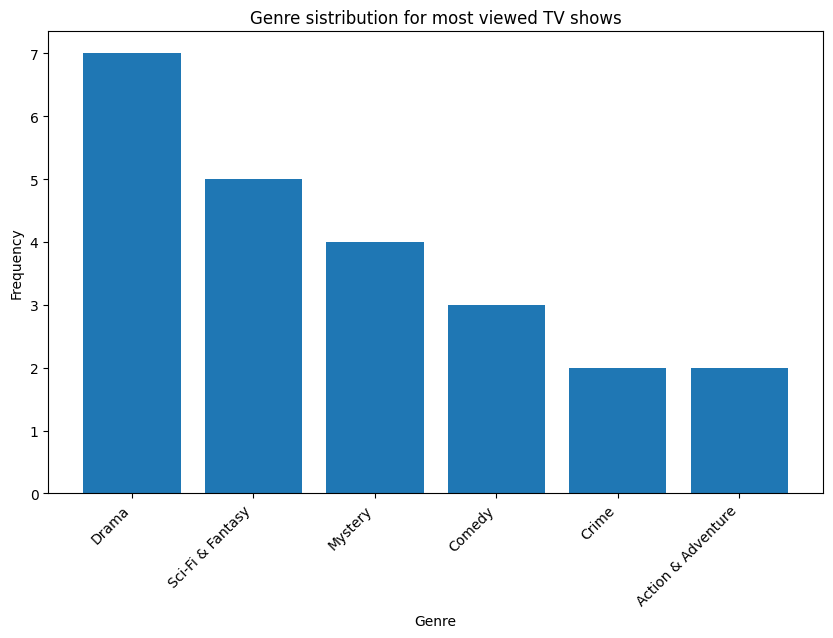

In [ ]:
# Create bar chart of genres that appear most in the top TV shows

from collections import Counter
# Flatten genres and count occurrences
all_genres = [genre for sublist in india_tv_details_switched['genres'] for genre in sublist]
genre_counts = Counter(all_genres)
sorted_genre_counts = dict(sorted(genre_counts.items(), key=lambda x: x[1], reverse=True))

# Plot genre distribution
plt.figure(figsize=(10, 6))
plt.bar(sorted_genre_counts.keys(), sorted_genre_counts.values())
plt.title('Genre sistribution for most viewed TV shows')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

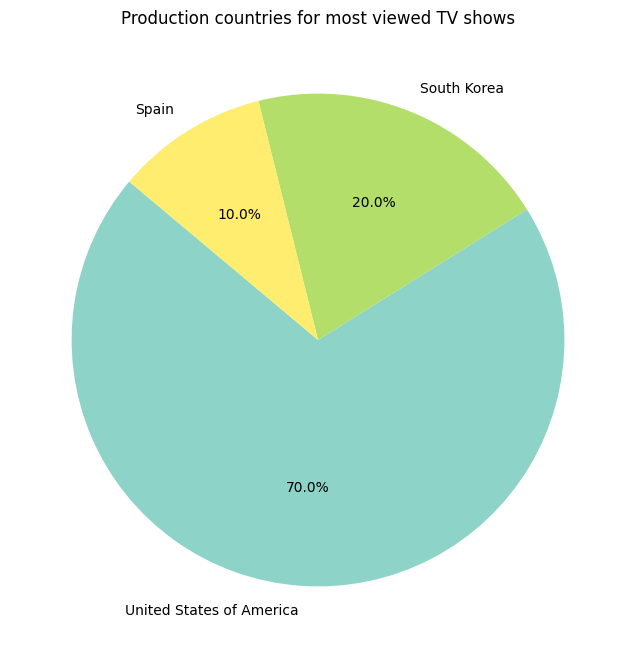

In [ ]:
# Pie chart for the production countries

# Count occurrences of each genre
country_counts = india_tv_details_switched['production_countries'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
country_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='Set3')

# Formatting
plt.ylabel('')  # Hide y-label
plt.title('Production countries for most viewed TV shows')

# Show plot
plt.show()

# 4. What movies and shows are available on Netflix India?

In [ ]:
df_netflix_india = pd.read_csv("/content/drive/MyDrive/Project 1/netflix_india_shows_and_movies.csv") # Dataset with all available productions on Netflix India (2024)
df_netflix_india

,showid,name,type,rating,duration,description,hook_text,genre,release_year,release_date,mood_tag,actors,creator,director,audio,subtitles,tags,similar_titles_id,production_country
0,81566729,Hot Wheels Let's Race,TVSeries,U/A 7+,1 Season,Six young hopefuls at the Hot Wheels Ultimate ...,NaN,Kids,2024.0,2024-3-4,Adrenaline Rush;Exciting,Griffin Campbell;Grey DeLisle;Eric Bauza;Jakar...,NaN,NaN,NaN,NaN,Kids' TV;TV Cartoons,81121910;80225085;81480111;81280732;80027979;8...,NaN
1,81739957,The Netflix Slam,Movie,U/A 7+,2.6833,It’s the legend vs. the prodigy as Rafael Nada...,"Play-by-play and commentary by Andre Agassi, A...",Sports,2024.0,2024-3-3,Feel-Good;Exciting,Rafael Nadal;Carlos Alcaraz;Andre Agassi;Andy ...,NaN,NaN,NaN,NaN,Sports & Fitness;Sports Events;US TV Shows,81569920;81026434;81025735;81128594;80204890;8...,United States
2,81407092,You Are Not Alone: Fighting the Wolf Pack,Movie,U/A 16+,1.7,"Through key testimonies, this documentary look...",NaN,Documentary,2023.0,2024-3-1,NaN,NaN,NaN,Almudena Carracedo;Robert Bahar,English;Spanish (Spain) - Audio Description;Sp...,English;English;Spanish (Spain),Spanish;Documentaries;Social & Cultural Docs,81150989;81168725;80215139;81637286;81667933;8...,Spain
3,81746263,"The Pig, the Snake and the Pigeon",Movie,A,2.2333,Upon discovering he's only Taiwan's third-most...,NaN,Drama,2023.0,2024-3-1,Emotional,Ethan Juan;Ben Yuen;Chen Yi-wen;Gingle Wang;Hs...,NaN,Wong Ching-po,Mandarin (Guoyu) [Original],English,Taiwanese;Crime Movies;Dramas;Action & Adventu...,81616524;81735590;81639031;81480217;81669979;8...,Taiwan
4,81301595,Spaceman,Movie,U/A 16+,1.8,"Six months into a solo mission, a lonely astro...",Adam Sandler stars with Oscar nominee Carey Mu...,Sci-Fi,2024.0,2024-3-1,Mind-Bending;Cerebral;Psychological,Adam Sandler;Carey Mulligan;Paul Dano;Kunal Na...,NaN,Johan Renck,English - Audio Description;English [Original]...,English,Sci-Fi Movies;Dramas;Movies Based on Books;Act...,81199139;81735590;81480217;81480320;80237957;8...,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6758,80058424,John Mulaney: The Comeback Kid,Movie,U/A 16+,1.0167,"Armed with boyish charm and a sharp wit, the f...",NaN,Comedy,2015.0,2015-11-13,Witty,John Mulaney,NaN,Rhys Thomas,English [Original],English,Stand-Up Comedy,81619082;80238110;81060252;81471774;80223685;8...,NaN
6759,81023623,Close Enemies,Movie,A,1.8333,"After an ambush leaves his partner dead, drug ...",Nominated for a Golden Lion at the Venice Film...,Drama,NaN,1970-1-1,Gritty,Matthias Schoenaerts;Reda Kateb;Adel Bencherif...,NaN,David Oelhoffen,NaN,NaN,French;Crime Movies;Dramas,81115400;81483371;81102814;81312798;81218770;8...,France
6760,80196044,The Crew,Movie,A,1.3333,"After an unexpected misstep, a crew of skilled...",French hip-hop artist Kaaris co-stars as a men...,Thriller,NaN,1970-1-1,Gritty,Sami Bouajila;Guillaume Gouix;Youssef Hajdi;Re...,NaN,Julien Leclercq,NaN,NaN,French;Crime Movies;Action & Adventure Movies,81175433;81079723;81446739;81721676;81115400;7...,France
6761,80151644,Puss in Book: Trapped in an Epic Tale,Movie,U/A 7+,0.5833,Puss in Boots has fallen into a magic book rul...,NaN,Kids,NaN,1970-1-1,Goofy,Eric Bauza;Jayma Mays;Maria Bamford;Jeff Benne...,NaN,Roy Burdine;Johnny Castuciano,NaN,NaN,Kids' TV;Children & Family Movies;Comedy Movie...,80018988;81054409;80994695;81108751;80227574;8...,United States


In [ ]:
df_netflix_india.columns

Index(['showid', 'name', 'type', 'rating', 'duration', 'description',
       'hook_text', 'genre', 'release_year', 'release_date', 'mood_tag',
       'actors', 'creator', 'director', 'audio', 'subtitles', 'tags',
       'similar_titles_id', 'production_country'],
      dtype='object')

In [ ]:
# Let's drop some columns

df_netflix_india.drop(columns = ['showid', 'rating', 'duration', 'description', 'hook_text',
                                 'release_date', 'mood_tag', 'actors', 'creator', 'director',
                                 'audio', 'subtitles', 'tags', 'similar_titles_id'], inplace = True)
df_netflix_india

,name,type,genre,release_year,production_country
0,Hot Wheels Let's Race,TVSeries,Kids,2024.0,NaN
1,The Netflix Slam,Movie,Sports,2024.0,United States
2,You Are Not Alone: Fighting the Wolf Pack,Movie,Documentary,2023.0,Spain
3,"The Pig, the Snake and the Pigeon",Movie,Drama,2023.0,Taiwan
4,Spaceman,Movie,Sci-Fi,2024.0,United States
...,...,...,...,...,...
6758,John Mulaney: The Comeback Kid,Movie,Comedy,2015.0,NaN
6759,Close Enemies,Movie,Drama,NaN,France
6760,The Crew,Movie,Thriller,NaN,France
6761,Puss in Book: Trapped in an Epic Tale,Movie,Kids,NaN,United States


In [ ]:
# Group by type and production country, count occurrences

df_netflix_india_gr = (
    df_netflix_india.groupby(['type', 'production_country'])
    .size()
    .reset_index(name='count')
    .sort_values(['type', 'count'], ascending=[True, False])
)

print(df_netflix_india_gr)


        type production_country  count
52     Movie      United States   1231
17     Movie              India    809
22     Movie              Japan    154
1      Movie             Africa    147
42     Movie              Spain    118
..       ...                ...    ...
63  TVSeries     Czech Republic      1
67  TVSeries             Greece      1
83  TVSeries               Peru      1
94  TVSeries        Switzerland      1
98  TVSeries            Ukraine      1

[103 rows x 3 columns]


In [ ]:
# Get total counts per production_country (regardless of type)
top_countries = (
    df_netflix_india_gr.groupby('production_country')['count']
    .sum()
    .nlargest(20)  # Select top 20
    .index
)

# Filter the original DataFrame to keep only these countries
df_top20 = df_netflix_india_gr[df_netflix_india_gr['production_country'].isin(top_countries)]

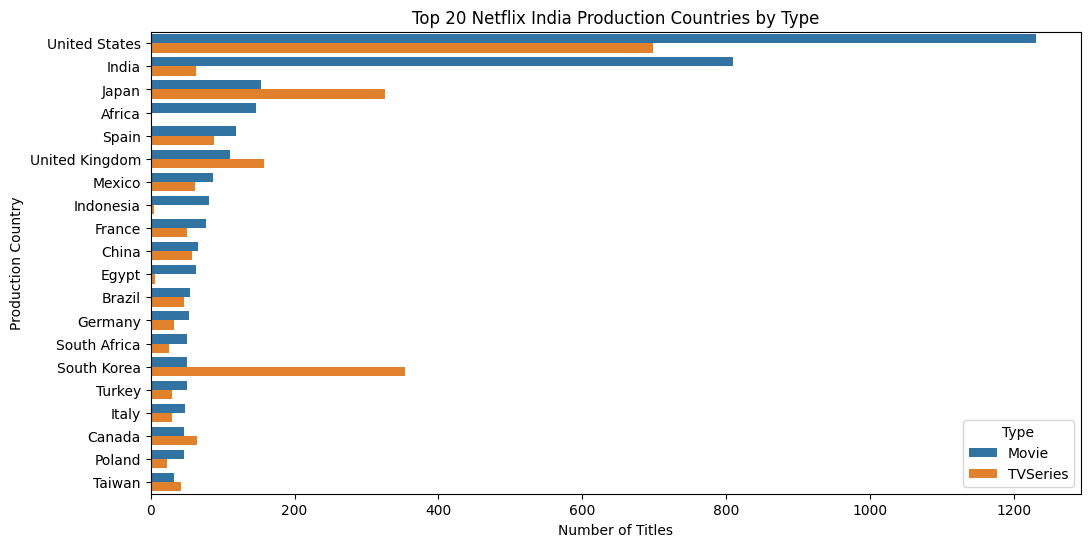

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(
    data=df_top20,
    x='count',
    y='production_country',
    hue='type',
    dodge=True,
    palette='tab10'
)

plt.xlabel("Number of Titles")
plt.ylabel("Production Country")
plt.title("Top 20 Netflix India Production Countries by Type")
plt.legend(title="Type")
plt.show()


# 5. More data on popular shows and movies, genres

In [45]:
import pandas as pd
url='https://drive.google.com/file/d/1eI4GLrO0NFkPMKi0ZArrdSBTCPcT42SZ/view?usp=drive_link'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [46]:
# Removed the 'show_id', 'director', and 'cast' columns
df = df.drop(['show_id', 'director', 'cast'], axis=1)

# Dropped rows with missing values (NaN) in the 'country' and 'listed_in' columns
df = df.dropna(subset=['country', 'listed_in'])

# Sorted the dataset by ascending order of the 'release_year' column
df = df.sort_values(by='release_year', ascending=True)

# Removed duplicate rows from the dataset
df.drop_duplicates(inplace=True)

# Display the resulting dataframe
df

,type,title,country,date_added,release_year,rating,duration,listed_in,description
7790,Movie,Prelude to War,United States,"March 31, 2017",1942,TV-14,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...
8205,Movie,The Battle of Midway,United States,"March 31, 2017",1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...
8660,Movie,Undercover: How to Operate Behind Enemy Lines,United States,"March 31, 2017",1943,TV-PG,61 min,"Classic Movies, Documentaries",This World War II-era training film dramatizes...
8763,Movie,WWII: Report from the Aleutians,United States,"March 31, 2017",1943,TV-PG,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...
8739,Movie,Why We Fight: The Battle of Russia,United States,"March 31, 2017",1943,TV-PG,82 min,Documentaries,This installment of Frank Capra's acclaimed do...
...,...,...,...,...,...,...,...,...,...
1062,TV Show,Law School,South Korea,"April 14, 2021",2021,TV-14,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",When a grim incident occurs at their prestigio...
1066,Movie,The Soul,"China, Taiwan","April 14, 2021",2021,TV-MA,130 min,"Dramas, International Movies, Thrillers",While investigating the death of a businessman...
1070,Movie,Why Did You Kill Me?,United States,"April 14, 2021",2021,TV-MA,84 min,Documentaries,The line between justice and revenge blurs whe...
959,Movie,The Disciple,India,"April 30, 2021",2021,TV-MA,128 min,"Dramas, Independent Movies, International Movies","Self-doubt, sacrifice and struggle converge in..."


In [47]:
# Found the top 10 countries with the most popular movies and TV shows
top_10_countries = df['country'].value_counts().nlargest(10)

# Found the top 10 genres based on the 'listed_in' column
top_10_genres = df['listed_in'].value_counts().nlargest(10)

print("Top 10 countries with the most popular movies and TV shows:")
print(top_10_countries)

print("\nTop 10 genres based on the 'listed_in' column:")
print(top_10_genres)

Top 10 countries with the most popular movies and TV shows:
country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64

Top 10 genres based on the 'listed_in' column:
listed_in
Documentaries                                       343
Dramas, International Movies                        337
Stand-Up Comedy                                     303
Comedies, Dramas, International Movies              260
Dramas, Independent Movies, International Movies    243
Children & Family Movies, Comedies                  181
Kids' TV                                            176
Documentaries, International Movies                 165
Dramas, International Movies, Romantic Movies       163
Comedies, International Movies                      155
Name: count, dtype: int64


In [48]:
# Filtered the dataset for entries from India
df_india = df[df['country'] == 'India']

# Separated movies and TV shows
movies = df_india[df_india['type'] == 'Movie'].nlargest(5, 'release_year')
tv_shows = df_india[df_india['type'] == 'TV Show'].nlargest(5, 'release_year')

# Displayed the top 5 movies and TV shows with their genres and release years
print("Top 5 Movies from India:")
print(movies[['title', 'listed_in', 'release_year']])

print("\nTop 5 TV Shows from India:")
print(tv_shows[['title', 'listed_in', 'release_year']])

Top 5 Movies from India:
                      title                                         listed_in  \
735                 Sarbath            Comedies, Dramas, International Movies   
190              Thimmarusu                      Dramas, International Movies   
551         Haseen Dillruba  International Movies, Romantic Movies, Thrillers   
1265  The Girl on the Train                   International Movies, Thrillers   
1281                    Red                      Dramas, International Movies   

      release_year  
735           2021  
190           2021  
551           2021  
1265          2021  
1281          2021  

Top 5 TV Shows from India:
              title                                          listed_in  \
4      Kota Factory  International TV Shows, Romantic TV Shows, TV ...   
39     Chhota Bheem                                           Kids' TV   
297        Navarasa                                           TV Shows   
1293  Pitta Kathalu                  I

<ipython-input-49-2728897042ff>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='release_year', y='title', data=movies, ax=axes[0], palette='viridis')
<ipython-input-49-2728897042ff>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='release_year', y='title', data=tv_shows, ax=axes[1], palette='magma')


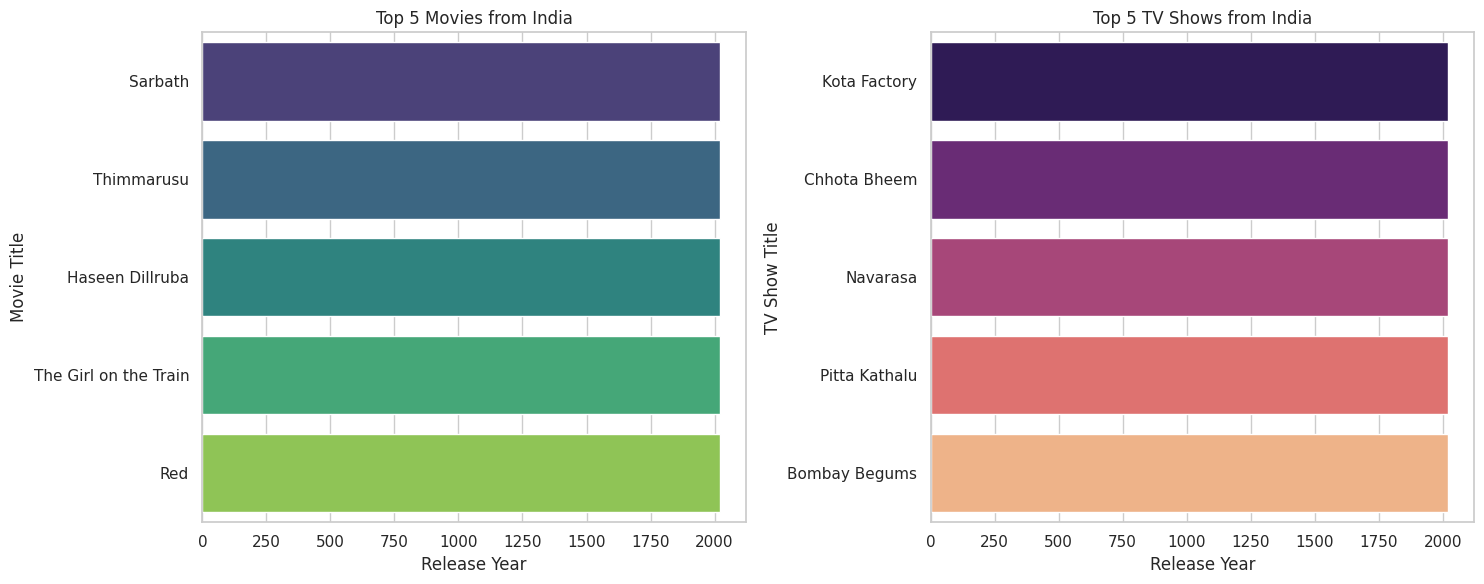

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set(style="whitegrid")

# Create subplots for movies and TV shows
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Create a bar plot for top 5 movies
sns.barplot(x='release_year', y='title', data=movies, ax=axes[0], palette='viridis')
axes[0].set_title('Top 5 Movies from India')
axes[0].set_xlabel('Release Year')
axes[0].set_ylabel('Movie Title')

# Create a bar plot for top 5 TV shows
sns.barplot(x='release_year', y='title', data=tv_shows, ax=axes[1], palette='magma')
axes[1].set_title('Top 5 TV Shows from India')
axes[1].set_xlabel('Release Year')
axes[1].set_ylabel('TV Show Title')

plt.tight_layout()
plt.show()

In [50]:
import pandas as pd
url='https://drive.google.com/file/d/1eI4GLrO0NFkPMKi0ZArrdSBTCPcT42SZ/view?usp=drive_link'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [52]:
# Found the top 10 countries with the most popular movies and TV shows
top_10_countries = df['country'].value_counts().nlargest(10)

# Found the top 10 genres based on the 'listed_in' column
top_10_genres = df['listed_in'].value_counts().nlargest(10)

print("Top 10 countries with the most popular movies and TV shows:")
print(top_10_countries)

print("\nTop 10 genres based on the 'listed_in' column:")
print(top_10_genres)

Top 10 countries with the most popular movies and TV shows:
country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64

Top 10 genres based on the 'listed_in' column:
listed_in
Documentaries                                       343
Dramas, International Movies                        337
Stand-Up Comedy                                     303
Comedies, Dramas, International Movies              260
Dramas, Independent Movies, International Movies    243
Children & Family Movies, Comedies                  181
Kids' TV                                            176
Documentaries, International Movies                 165
Dramas, International Movies, Romantic Movies       163
Comedies, International Movies                      155
Name: count, dtype: int64


In [53]:
# Filtered the dataset for entries from India
df_india = df[df['country'] == 'India']

# Separated movies and TV shows
movies = df_india[df_india['type'] == 'Movie'].nlargest(5, 'release_year')
tv_shows = df_india[df_india['type'] == 'TV Show'].nlargest(5, 'release_year')

# Displayed the top 5 movies and TV shows with their genres and release years
print("Top 5 Movies from India:")
print(movies[['title', 'listed_in', 'release_year']])

print("\nTop 5 TV Shows from India:")
print(tv_shows[['title', 'listed_in', 'release_year']])

Top 5 Movies from India:
                  title                                         listed_in  \
190          Thimmarusu                      Dramas, International Movies   
551     Haseen Dillruba  International Movies, Romantic Movies, Thrillers   
735             Sarbath            Comedies, Dramas, International Movies   
850            99 Songs    Dramas, International Movies, Music & Musicals   
871  Sardar Ka Grandson            Comedies, Dramas, International Movies   

     release_year  
190          2021  
551          2021  
735          2021  
850          2021  
871          2021  

Top 5 TV Shows from India:
              title                                          listed_in  \
4      Kota Factory  International TV Shows, Romantic TV Shows, TV ...   
39     Chhota Bheem                                           Kids' TV   
297        Navarasa                                           TV Shows   
876    Alma Matters                 Docuseries, International TV Sho

# 6. Revenue data


In [54]:
import pandas as pd #Iryna
url='https://drive.google.com/file/d/1qEppvcf9wAGuuxd1Leq28xM_bQVyWvwV/view?usp=drive_link'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)
df.head()

,Date,Global Revenue,UCAN Streaming Revenue,EMEA Streaming Revenue,LATM Streaming Revenue,APAC Streaming Revenue,UCAN Members,EMEA Members,LATM Members,APAC Members,UCAN ARPU,EMEA ARPU,LATM ARPU,APAC ARPU,Netflix Streaming Memberships
0,31-03-2019,4520992000,2256851000,1233379000,630472000,319602000,66633000,42542000,27547000,12141000,11.45,10.23,7.84,9.37,148863000
1,30-06-2019,4923116000,2501199000,1319087000,677136000,349494000,66501000,44229000,27890000,12942000,12.52,10.13,8.14,9.29,151562000
2,30-09-2019,5244905000,2621250000,1428040000,741434000,382304000,67114000,47355000,29380000,14485000,13.08,10.40,8.63,9.29,158334000
3,31-12-2019,5467434000,2671908000,1562561000,746392000,418121000,67662000,51778000,31417000,16233000,13.22,10.51,8.18,9.07,167090000
4,31-03-2020,5767691000,2702776000,1723474000,793453000,483660000,69969000,58734000,34318000,19835000,13.09,10.40,8.05,8.94,182856000


<ipython-input-58-552bd3751d13>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index.year, y=df["APAC Streaming Revenue"], palette="viridis")


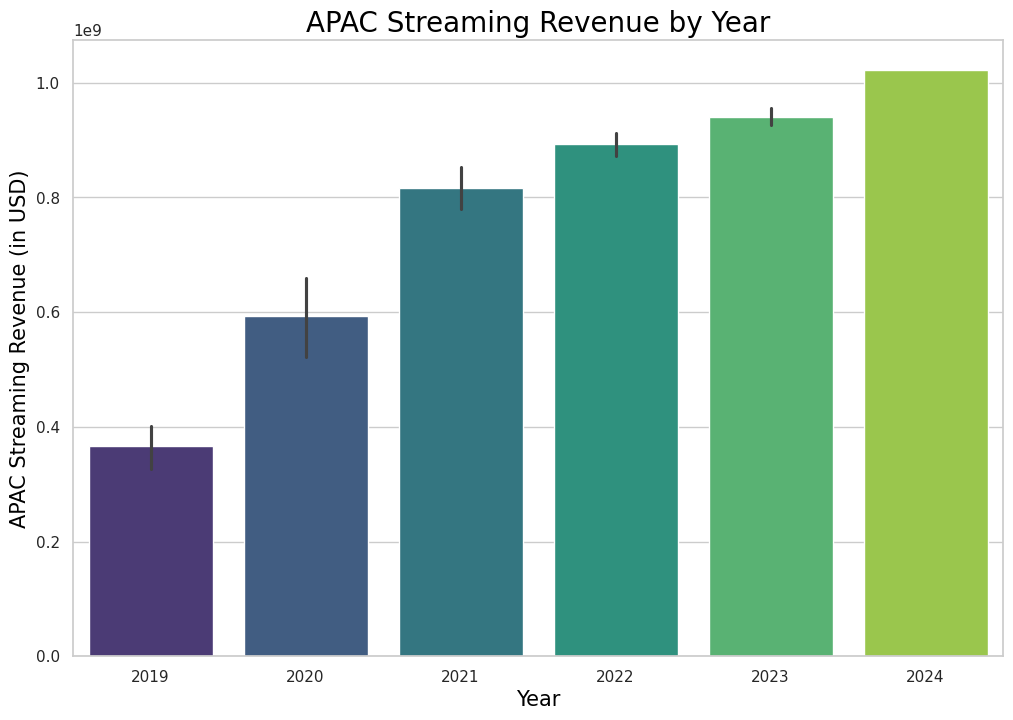

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the revenue for the APAC region each year
plt.figure(figsize=(12, 8))
sns.barplot(x=df.index.year, y=df["APAC Streaming Revenue"], palette="viridis")
plt.xlabel("Year", fontdict={'family': 'fantasy', 'color': 'black', 'size': 15})
plt.ylabel("APAC Streaming Revenue (in USD)", fontdict={'family': 'fantasy', 'color': 'black', 'size': 15})
plt.title("APAC Streaming Revenue by Year", fontdict={'family': 'fantasy', 'color': 'black', 'size': 20})

plt.show()

<ipython-input-57-96967b0a5a3e>:22: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations

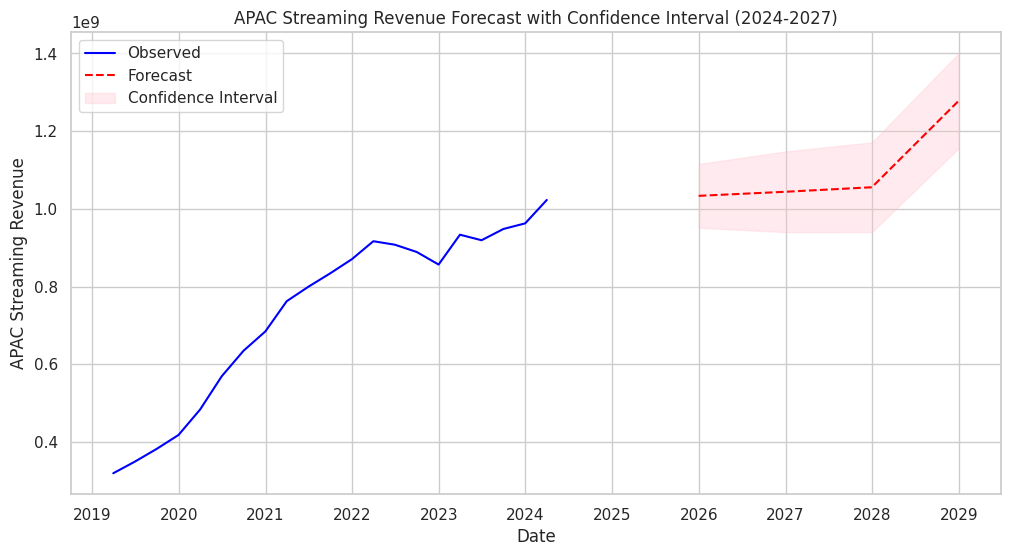

In [57]:
import pandas as pd
import requests
from io import BytesIO
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Function to fetch the content from the URL
def fetch_file_content(url):
    file_id = url.split('/')[-2]
    dwn_url = 'https://drive.google.com/uc?id=' + file_id
    response = requests.get(dwn_url)
    content = response.content
    return content

# Fetch the file content
file_content = fetch_file_content('https://drive.google.com/file/d/1qEppvcf9wAGuuxd1Leq28xM_bQVyWvwV/view?usp=sharing')

# Read the CSV content into a pandas DataFrame
df = pd.read_csv(BytesIO(file_content))

# Prepare the data
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Fit the SARIMAX model with seasonal parameters
model = SARIMAX(df["APAC Streaming Revenue"], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Make predictions for the future dates including 2024-2027
forecast_horizon = 4  # 2024 to 2027 (inclusive)
forecast = results.get_forecast(steps=forecast_horizon)
forecast_values = forecast.predicted_mean.to_numpy()
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_horizon + 1, freq='Y')[1:]  # Updated the forecast index to start from the latest date in the dataset

# Plot the forecasted values and historical data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["APAC Streaming Revenue"], label='Observed', color='blue')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red', linestyle='--')
plt.fill_between(forecast_index, forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')
plt.xlabel('Date')
plt.ylabel('APAC Streaming Revenue')
plt.title('APAC Streaming Revenue Forecast with Confidence Interval (2024-2027)')
plt.legend()
plt.show()